<a href="https://colab.research.google.com/github/Ly-xinhgai/recommendation-system-using-knn/blob/main/sinh_d%E1%BB%AF_li%E1%BB%87u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from ruptures import Binseg


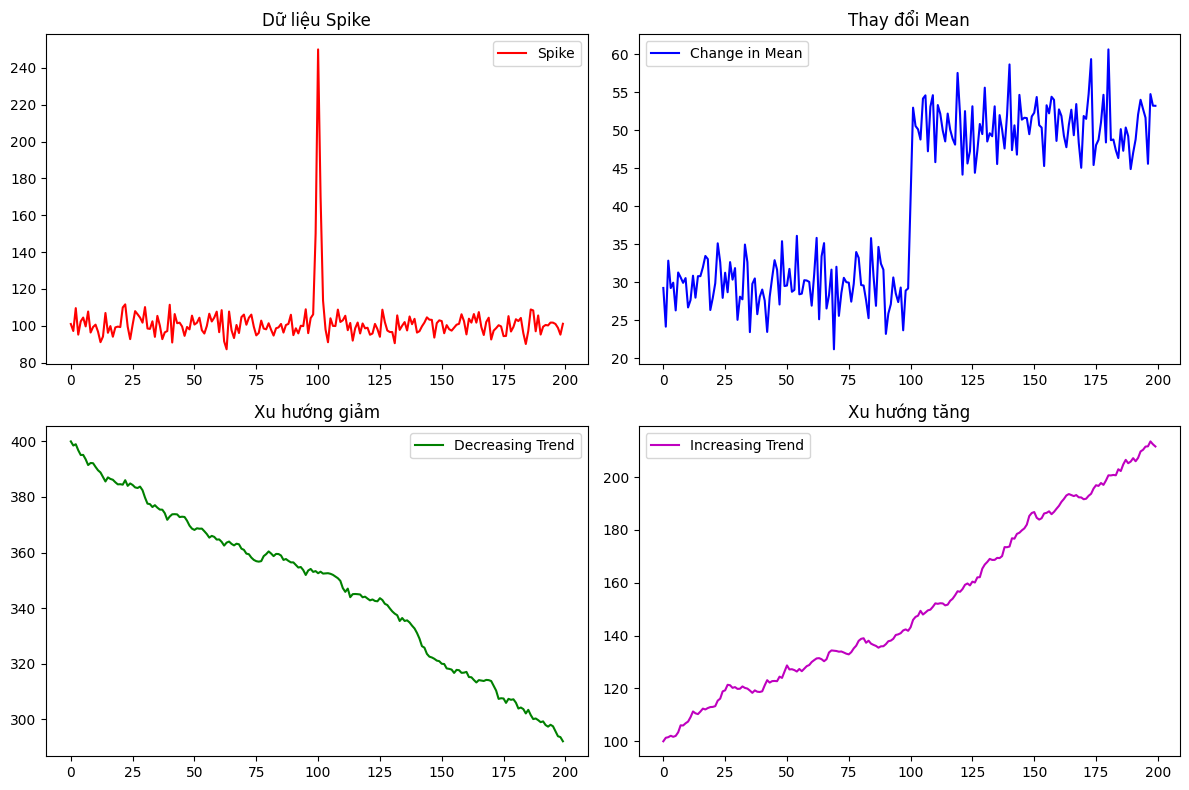

In [2]:

# 1. Sinh Spike
t = np.arange(200)
x_spike = 100 + 5 * np.random.randn(200)
x_spike[99], x_spike[100], x_spike[101] = 150, 250, 170

# 2. Thay đổi mean
x_mean = np.zeros(200)
x_mean[:100] = 30 + 3 * np.random.randn(100)
x_mean[101:] = 50 + 3 * np.random.randn(99)
x_mean[100] = (x_mean[99] + x_mean[101]) / 2

# 3. Xu hướng giảm
x_decreasing = np.zeros(200)
x_decreasing[0] = 400
for i in range(1, 200):
    x_decreasing[i] = x_decreasing[i-1] - 0.5 - np.random.randn()

# 4. Xu hướng tăng
x_increasing = np.zeros(200)
x_increasing[0] = 100
for i in range(1, 200):
    x_increasing[i] = x_increasing[i-1] + 0.5 + np.random.randn()

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(t, x_spike, label='Spike', color='r')
axes[0, 0].set_title('Dữ liệu Spike')
axes[0, 0].legend()

axes[0, 1].plot(t, x_mean, label='Change in Mean', color='b')
axes[0, 1].set_title('Thay đổi Mean')
axes[0, 1].legend()

axes[1, 0].plot(t, x_decreasing, label='Decreasing Trend', color='g')
axes[1, 0].set_title('Xu hướng giảm')
axes[1, 0].legend()

axes[1, 1].plot(t, x_increasing, label='Increasing Trend', color='m')
axes[1, 1].set_title('Xu hướng tăng')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


Spike Anomalies at indices: [ 99 100 101]
Mean Change Detected at indices: [100]
General Anomalies at indices: [  0   4   7   8  14  33  99 100 101 199]


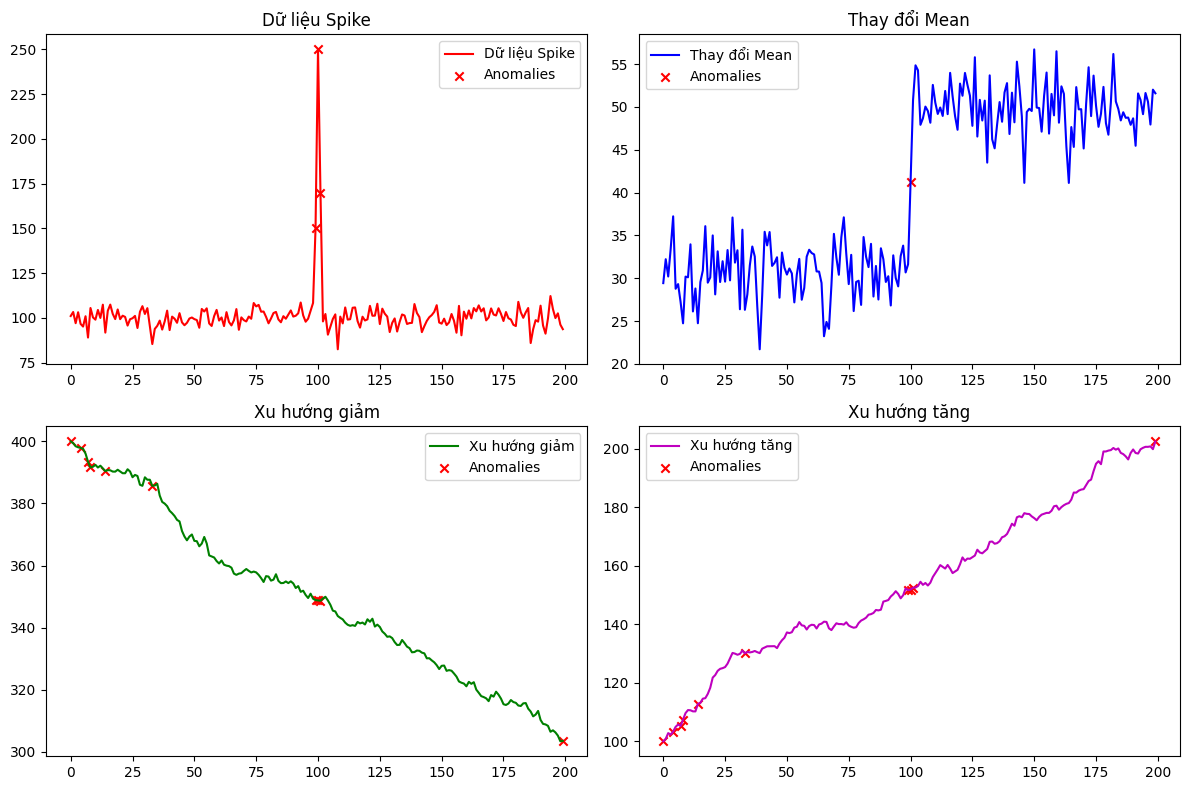

In [12]:


# 1. Sinh Spike
t = np.arange(200)
x_spike = 100 + 5 * np.random.randn(200)
x_spike[99], x_spike[100], x_spike[101] = 150, 250, 170

# Áp dụng Z-score để phát hiện Spike
z_scores = np.abs(zscore(x_spike))
spike_anomalies = np.where(z_scores > 3)[0]
print("Spike Anomalies at indices:", spike_anomalies)

# 2. Thay đổi mean
x_mean = np.zeros(200)
x_mean[:100] = 30 + 3 * np.random.randn(100)
x_mean[101:] = 50 + 3 * np.random.randn(99)
x_mean[100] = (x_mean[99] + x_mean[101]) / 2

# Sử dụng Ruptures để phát hiện thay đổi mean
algo = Binseg(model="l2").fit(x_mean)
mean_change_points = algo.predict(n_bkps=1)
print("Mean Change Detected at indices:", mean_change_points[:-1])

# 3. Xu hướng giảm
x_decreasing = np.zeros(200)
x_decreasing[0] = 400
for i in range(1, 200):
    x_decreasing[i] = x_decreasing[i-1] - 0.5 - np.random.randn()

# 4. Xu hướng tăng
x_increasing = np.zeros(200)
x_increasing[0] = 100
for i in range(1, 200):
    x_increasing[i] = x_increasing[i-1] + 0.5 + np.random.randn()

# Áp dụng Isolation Forest để phát hiện bất thường trên toàn bộ dữ liệu
X = np.vstack([x_spike, x_mean, x_decreasing, x_increasing]).T
model = IsolationForest(contamination=0.05, random_state=42)
labels = model.fit_predict(X)
anomalies = np.where(labels == -1)[0]
print("General Anomalies at indices:", anomalies)

# Vẽ biểu đồ với điểm bất thường
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

def plot_with_anomalies(ax, data, title, color, anomaly_indices=None):
    ax.plot(t, data, label=title, color=color)
    if anomaly_indices is not None:
        ax.scatter(t[anomaly_indices], data[anomaly_indices], color='red', label='Anomalies', marker='x')
    ax.set_title(title)
    ax.legend()

plot_with_anomalies(axes[0, 0], x_spike, 'Dữ liệu Spike', 'r', spike_anomalies)
plot_with_anomalies(axes[0, 1], x_mean, 'Thay đổi Mean', 'b', mean_change_points[:-1])
plot_with_anomalies(axes[1, 0], x_decreasing, 'Xu hướng giảm', 'g', anomalies)
plot_with_anomalies(axes[1, 1], x_increasing, 'Xu hướng tăng', 'm', anomalies)

plt.tight_layout()
plt.show()
